In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("daily-min-temperatures.csv",parse_dates=['Date'],index_col='Date')

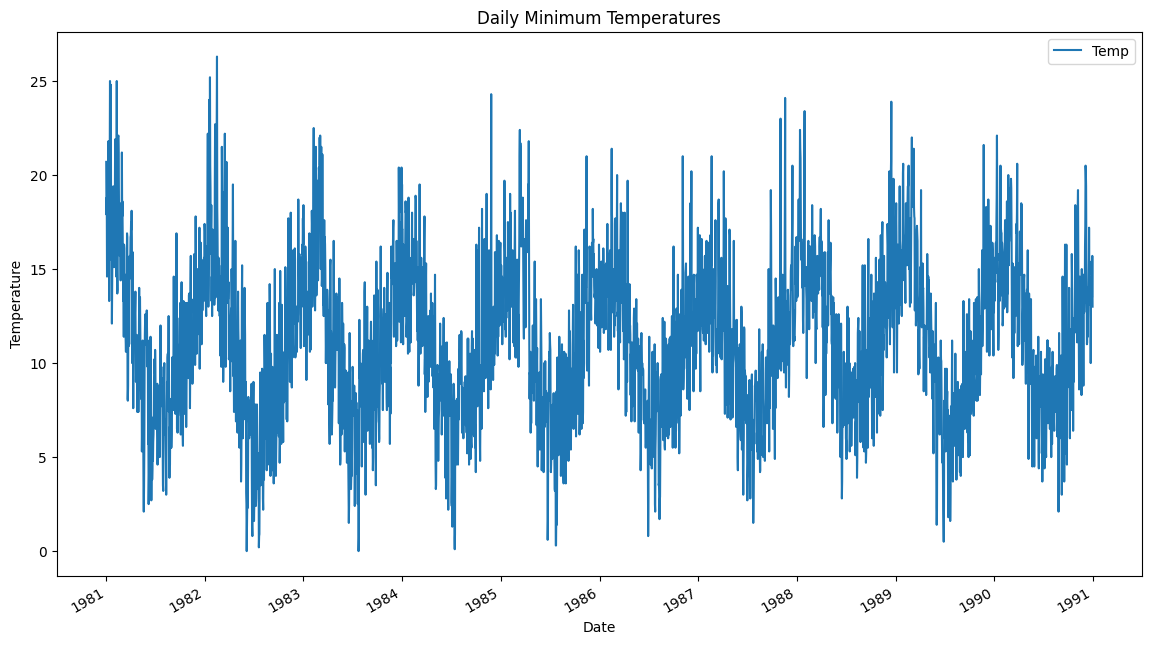

In [5]:
df.plot(title='Daily Minimum Temperatures',figsize=(14,8))
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.show()

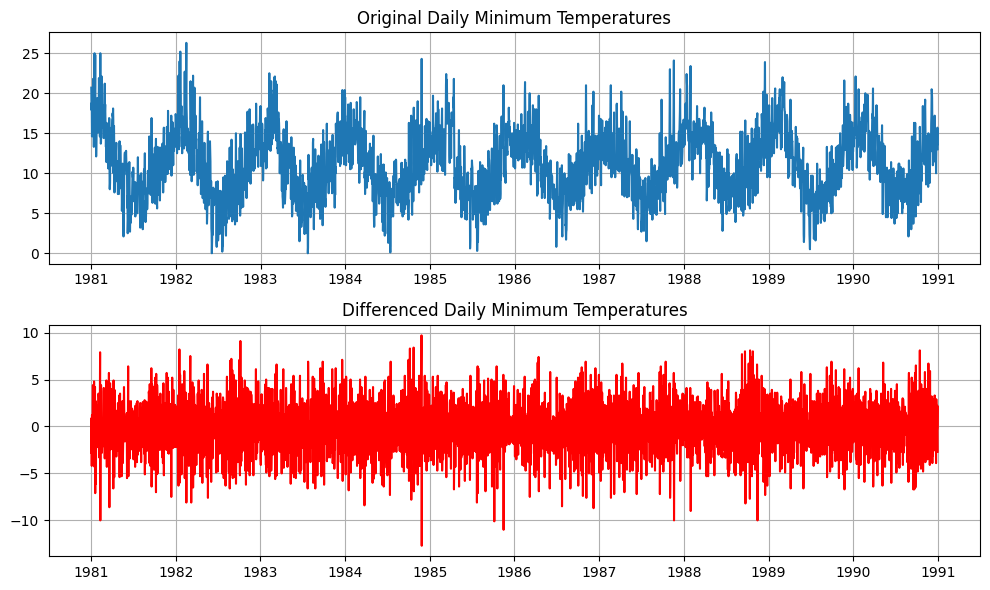

In [7]:
series=pd.read_csv("daily-min-temperatures.csv",header=0,index_col=0,parse_dates=True)
differenced_series=series.diff(periods=1)
plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.plot(series,label='Original Series')
plt.title("Original Daily Minimum Temperatures")
plt.grid()
plt.subplot(2,1,2)
plt.plot(differenced_series,label='Differenced Series',color='red')
plt.title("Differenced Daily Minimum Temperatures")
plt.grid()
plt.tight_layout()
plt.show()

In [8]:
X=series.values

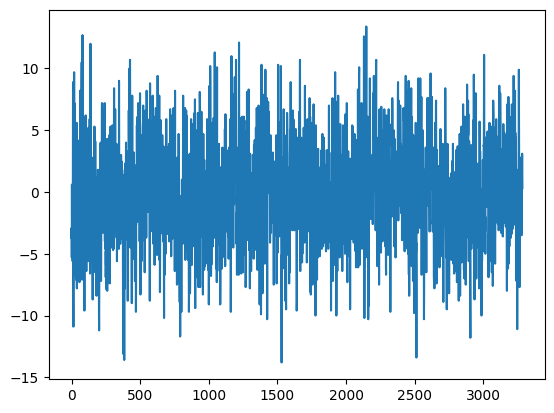

In [10]:
diff=list()
days_in_year=365
for i in range(days_in_year,len(X)):
    value=X[i]-X[i-days_in_year]
    diff.append(value)
plt.plot(diff)
plt.show()

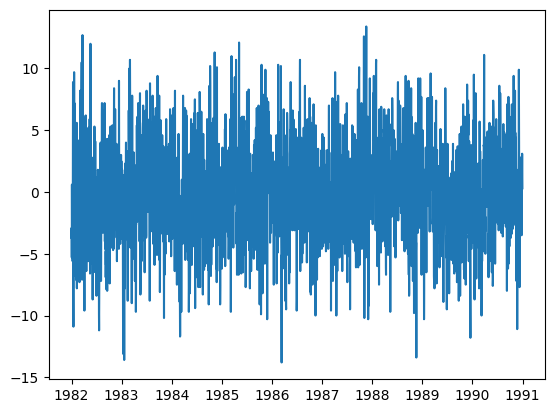

In [11]:
diff_series=series.diff(periods=365)
plt.plot(diff_series)

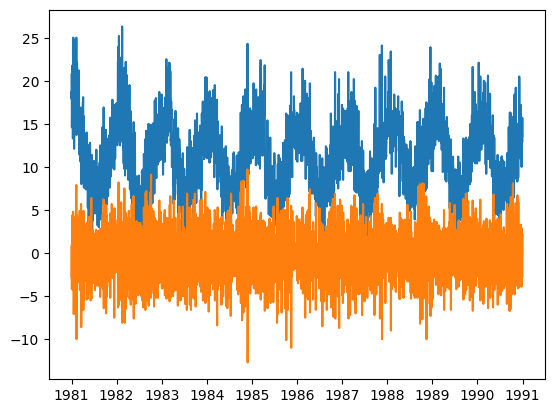

In [12]:
df_temperature=pd.read_csv("daily-min-temperatures.csv",parse_dates=[0],index_col=0)
df_temperature['diff']=df_temperature['Temp'].diff(periods=1)
plt.plot(df_temperature.index,df_temperature['Temp'])
plt.plot(df_temperature.index,df_temperature['diff'])


[[-1.17308000e-08]
 [ 9.30253946e-06]
 [-2.15977594e-03]
 [ 1.19147966e-01]
 [ 1.38980178e+01]]


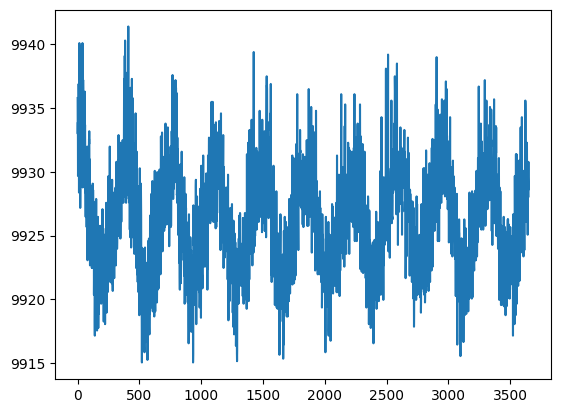

In [14]:
from numpy import polyfit
y=series.values
X=[i%365 for i in range(0,len(series))]
degree=4
coef=polyfit(X,y,degree)
print(coef)
curve=list()
for i in range(len(X)):
    value=coef[-1]
    for d in range(degree):
        value+=X[i]**(degree-d)*coef[d]
        curve.append(value)
values=series.values
diff=list()
for i in range(len(values)):
    value=values[i]-curve[i]
    diff.append(value)
plt.plot(diff)